In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab_Data_Files/insomnia_data.csv')

In [ ]:
df.head()

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,...,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total
0,sub_001,0,0,0,0,19.3,0,0,0,0,...,-0.701562,2.215354,0.740137,-1.122805,1.905727,-0.114565,1.083087,-0.656051,0.538016,0.575806
1,sub_002,0,0,0,0,19.3,0,0,0,0,...,1.545013,0.327833,1.078180,-0.552396,-0.302127,-0.114565,1.083087,-0.656051,0.538016,0.153943
2,sub_003,0,0,0,1,18.8,0,0,0,0,...,-0.327133,1.743474,-0.612036,-0.267191,-1.406055,-0.425527,0.271626,-0.656051,-0.260601,-0.619473
3,sub_004,0,0,0,0,18.8,0,0,0,0,...,-1.824849,-1.559689,-0.612036,-0.552396,0.249836,-0.114565,0.596210,-0.116442,0.538016,0.224254
4,sub_005,1,2,0,1,19.6,0,0,0,0,...,-2.199279,-0.615928,-0.950080,0.588422,1.353763,0.196397,0.109334,0.153363,1.336632,0.857049


In [ ]:
df.shape

(95, 174)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Columns: 174 entries, ID to ZDERS_total
dtypes: float64(92), int64(76), object(6)
memory usage: 129.3+ KB


In [ ]:
df.columns

Index(['ID', 'Group', 'SubGroup', 'Remote', 'Sex', 'Age', 'American_Indian',
       'Asian', 'Native_Hawaiian', 'Black',
       ...
       'Zcope_acccept', 'Zcope_suppression', 'Zcope_planning',
       'Zders_nonaccpetance', 'Zders_goals', 'Zders_impulse',
       'Zders_awareness', 'Zders_strategies', 'Zders_clarity', 'ZDERS_total'],
      dtype='object', length=174)

In [ ]:
new_df=df.iloc[:,:94]
new_df.shape
new_df.drop(['ID'],axis=1)

,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,...,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies
0,0,0,0,0,19.3,0,0,0,0,1,...,14,9,13,13,6,87,20,10.0,26,12
1,0,0,0,0,19.3,0,0,0,0,1,...,8,15,9,14,8,81,12,10.0,26,12
2,0,0,0,1,18.8,0,0,0,0,1,...,16,10,12,9,9,70,8,9.0,21,12
3,0,0,0,0,18.8,0,0,0,0,1,...,13,6,5,9,8,82,14,10.0,23,14
4,1,2,0,1,19.6,0,0,0,0,1,...,9,5,7,8,12,91,18,11.0,20,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1,1,1,1,16.9,0,0,0,0,1,...,4,7,8,9,18,83,12,8.0,20,11
91,1,2,1,0,16.6,0,0,0,0,1,...,8,12,8,12,8,79,15,13.0,15,12
92,1,2,1,1,17.3,0,0,0,0,1,...,6,13,8,13,13,96,18,8.0,25,15
93,1,2,1,0,16.8,0,0,0,0,1,...,10,16,9,15,6,37,6,6.0,6,8


#Data Cleaning

In [ ]:
# Reverse one-hot encoding-Race
new_df['Race'] = new_df[['American_Indian', 'Asian', 'Native_Hawaiian', 'Black', 'White','unknown_Race']].idxmax(axis=1)

# Drop the one-hot encoded columns-Race
new_df.drop(columns=['American_Indian', 'Asian', 'Native_Hawaiian', 'Black', 'White','unknown_Race'], inplace=True)
print(new_df.tail)


<bound method NDFrame.tail of          ID  Group  SubGroup  Remote  Sex   Age  Hispanic  NotHispanic  \
0   sub_001      0         0       0    0  19.3         0            1   
1   sub_002      0         0       0    0  19.3         0            1   
2   sub_003      0         0       0    1  18.8         0            1   
3   sub_004      0         0       0    0  18.8         0            1   
4   sub_005      1         2       0    1  19.6         0            1   
..      ...    ...       ...     ...  ...   ...       ...          ...   
90  sub_091      1         1       1    1  16.9         0            1   
91  sub_092      1         2       1    0  16.6         1            0   
92  sub_093      1         2       1    1  17.3         0            1   
93  sub_094      1         2       1    0  16.8         0            1   
94  sub_095      1         1       1    0  16.7         0            1   

    unknown_Etnicity  PDS_FEMALE  ...  cope_acccept  cope_suppression  \
0       

In [ ]:
# Reverse one-hot encoding-Ethnicity
new_df['Ethnicity'] = new_df[['Hispanic','NotHispanic','unknown_Etnicity']].idxmax(axis=1)

# Drop the one-hot encoded columns-Ethnicity
new_df.drop(columns=['Hispanic','NotHispanic','unknown_Etnicity'], inplace=True)
print(new_df.tail)

<bound method NDFrame.tail of          ID  Group  SubGroup  Remote  Sex   Age  PDS_FEMALE  PDS_MALE  \
0   sub_001      0         0       0    0  19.3        16.0       NaN   
1   sub_002      0         0       0    0  19.3        13.0       NaN   
2   sub_003      0         0       0    1  18.8         NaN      16.0   
3   sub_004      0         0       0    0  18.8        17.0       NaN   
4   sub_005      1         2       0    1  19.6         NaN      14.0   
..      ...    ...       ...     ...  ...   ...         ...       ...   
90  sub_091      1         1       1    1  16.9         NaN      15.0   
91  sub_092      1         2       1    0  16.6        13.0       NaN   
92  sub_093      1         2       1    1  17.3         NaN      14.0   
93  sub_094      1         2       1    0  16.8        15.0       NaN   
94  sub_095      1         1       1    0  16.7        14.0       NaN   

    ISI_total  PSQI_total  ...  cope_suppression  cope_planning  \
0           0           0 

In [ ]:
new_df.columns

Index(['ID', 'Group', 'SubGroup', 'Remote', 'Sex', 'Age', 'PDS_FEMALE',
       'PDS_MALE', 'ISI_total', 'PSQI_total', 'BDI_total', 'ASHS_total',
       'ASHS_physiological', 'ASHS_cognitive', 'ASHS_emotional',
       'ASHS_SleepEnvirnmont', 'ASHS_DaytimeSleep', 'ASHS_substances',
       'ASHS_bedtimeRoutine', 'ASHS_sleepStability', 'ASHS_BedroomSharing',
       'DBAS_total', 'FIRST_total', 'GCTI_total', 'GCTI_anxiety',
       'GCTI_reflection', 'GCTI_worries', 'GCTI_thoughts',
       'GCTI_negativeAffect', 'STAI_Y_total', 'NEO_neuroticism',
       'NEO_extraversion', 'NEO_openness', 'NEO_agreeableness',
       'NEO_Conscientiousness', 'MEQr_total', 'PSRS_PrR', 'PSRS_RWO',
       'PSRS_RSC', 'PSRS_FRa', 'PSRS_RSE', 'PSRS_total', 'PSS_total',
       'TCQI_R_Total', 'TCQIR_Aggressive_supression',
       'TCQIR_cognitive_distraction', 'TCQIR_reappraisal',
       'TCQIR_behavtioral_distraction', 'TCQIR_social_avoidance',
       'TCQIR_worry', 'ACE_tot', 'asq_home', 'asq_school', 'asq_attend

In [ ]:
id_vars=['Group', 'SubGroup', 'Remote', 'Sex', 'Age', 'Race', 'Ethnicity',
        'ISI_total', 'PSQI_total', 'BDI_total',
       'ASHS_total', 'ASHS_physiological', 'ASHS_cognitive', 'ASHS_emotional',
       'ASHS_SleepEnvirnmont', 'ASHS_DaytimeSleep', 'ASHS_substances',
       'ASHS_bedtimeRoutine', 'ASHS_sleepStability', 'ASHS_BedroomSharing',
       'DBAS_total', 'FIRST_total', 'GCTI_total', 'GCTI_anxiety',
       'GCTI_reflection', 'GCTI_worries', 'GCTI_thoughts',
       'GCTI_negativeAffect', 'STAI_Y_total', 'NEO_neuroticism',
       'NEO_extraversion', 'NEO_openness', 'NEO_agreeableness',
       'NEO_Conscientiousness', 'MEQr_total', 'PSRS_PrR', 'PSRS_RWO',
       'PSRS_RSC', 'PSRS_FRa', 'PSRS_RSE', 'PSRS_total', 'PSS_total',
       'TCQI_R_Total', 'TCQIR_Aggressive_supression',
       'TCQIR_cognitive_distraction', 'TCQIR_reappraisal',
       'TCQIR_behavtioral_distraction', 'TCQIR_social_avoidance',
       'TCQIR_worry', 'ACE_tot', 'asq_home', 'asq_school', 'asq_attendance',
       'asq_romantic', 'asq_peer', 'asq_teacher', 'asq_future', 'asq_leisure',
       'asq_finance', 'asq_responsibility', 'casq_total', 'casq_sleepy',
       'casq_alert', 'cope_disengage_su', 'cope_growth',
       'cope_disengage_mental', 'cope_emotions', 'cope_socialsupp_instr',
       'cope_active', 'cope_denial', 'cope_religion', 'cope_humor',
       'cope_disengage_emo', 'cope_restraint', 'cope_socialsupp_emo',
       'cope_acccept', 'cope_suppression', 'cope_planning',
       'ders_nonaccpetance', 'ders_total', 'ders_goals', 'ders_impulse',
       'ders_awareness', 'ders_strategies']

value_vars=['PDS_FEMALE', 'PDS_MALE']
# Melt columns B, C, and D into a new column "Variable"
melted_df = pd.melt(new_df, id_vars=id_vars, value_vars=value_vars, var_name='PDS', value_name='PDS_Value')
melted_df.shape

(190, 86)

In [ ]:
melted_df.columns

Index(['Group', 'SubGroup', 'Remote', 'Sex', 'Age', 'Race', 'Ethnicity',
       'ISI_total', 'PSQI_total', 'BDI_total', 'ASHS_total',
       'ASHS_physiological', 'ASHS_cognitive', 'ASHS_emotional',
       'ASHS_SleepEnvirnmont', 'ASHS_DaytimeSleep', 'ASHS_substances',
       'ASHS_bedtimeRoutine', 'ASHS_sleepStability', 'ASHS_BedroomSharing',
       'DBAS_total', 'FIRST_total', 'GCTI_total', 'GCTI_anxiety',
       'GCTI_reflection', 'GCTI_worries', 'GCTI_thoughts',
       'GCTI_negativeAffect', 'STAI_Y_total', 'NEO_neuroticism',
       'NEO_extraversion', 'NEO_openness', 'NEO_agreeableness',
       'NEO_Conscientiousness', 'MEQr_total', 'PSRS_PrR', 'PSRS_RWO',
       'PSRS_RSC', 'PSRS_FRa', 'PSRS_RSE', 'PSRS_total', 'PSS_total',
       'TCQI_R_Total', 'TCQIR_Aggressive_supression',
       'TCQIR_cognitive_distraction', 'TCQIR_reappraisal',
       'TCQIR_behavtioral_distraction', 'TCQIR_social_avoidance',
       'TCQIR_worry', 'ACE_tot', 'asq_home', 'asq_school', 'asq_attendance',
    

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Race'.
melted_df['Race']= label_encoder.fit_transform(melted_df['Race'])

melted_df['Race'].unique()

# Encode labels in column 'Ethnicity'.
melted_df['Ethnicity']= label_encoder.fit_transform(melted_df['Ethnicity'])

melted_df['Ethnicity'].unique()

# Encode labels in column 'cope_religion'.
melted_df['cope_religion']= label_encoder.fit_transform(melted_df['cope_religion'])

melted_df['cope_religion'].unique()

# Encode labels in column 'PDS'.
melted_df['PDS']= label_encoder.fit_transform(melted_df['PDS'])

melted_df['PDS'].unique()

# Encode labels in column 'ASHS_physiological'.
melted_df['ASHS_physiological']= label_encoder.fit_transform(melted_df['ASHS_physiological'])

melted_df['ASHS_physiological'].unique()

# Encode labels in column 'DBAS_total'.
melted_df['DBAS_total']= label_encoder.fit_transform(melted_df['DBAS_total'])

melted_df['DBAS_total'].unique()


array([24,  1,  0, 11, 80, 32, 89,  5, 26, 50, 25, 83, 22, 88, 28,  6, 39,
        4, 55, 51, 59, 35, 66, 69, 43, 42, 40, 14, 61, 72, 45, 33, 54, 78,
       85, 68, 16, 52, 47, 38,  7, 13, 64, 60, 84, 29,  3, 36,  2, 58, 15,
       34, 79, 46, 18,  9, 74, 49, 44, 63, 57, 77, 62, 53, 30, 12, 23, 37,
       82, 31, 73,  8, 87, 71, 67, 81, 65, 41, 70, 10, 48, 86, 21, 56, 76,
       27, 17, 20, 75, 19, 90])

In [ ]:
new_column_order = ['Group', 'SubGroup', 'Remote', 'Sex', 'Age', 'Race', 'Ethnicity',
                    'PDS', 'PDS_Value', 'ISI_total', 'PSQI_total', 'BDI_total', 'ASHS_total',
                    'ASHS_physiological', 'ASHS_cognitive', 'ASHS_emotional',
                    'ASHS_SleepEnvirnmont', 'ASHS_DaytimeSleep', 'ASHS_substances',
                    'ASHS_bedtimeRoutine', 'ASHS_sleepStability', 'ASHS_BedroomSharing',
                    'DBAS_total', 'FIRST_total', 'GCTI_total', 'GCTI_anxiety',
                    'GCTI_reflection', 'GCTI_worries', 'GCTI_thoughts',
                    'GCTI_negativeAffect', 'STAI_Y_total', 'NEO_neuroticism',
                    'NEO_extraversion', 'NEO_openness', 'NEO_agreeableness',
                    'NEO_Conscientiousness', 'MEQr_total', 'PSRS_PrR', 'PSRS_RWO',
                    'PSRS_RSC', 'PSRS_FRa', 'PSRS_RSE', 'PSRS_total', 'PSS_total',
                    'TCQI_R_Total', 'TCQIR_Aggressive_supression',
                    'TCQIR_cognitive_distraction', 'TCQIR_reappraisal',
                    'TCQIR_behavtioral_distraction', 'TCQIR_social_avoidance',
                    'TCQIR_worry', 'ACE_tot', 'asq_home', 'asq_school', 'asq_attendance',
                    'asq_romantic', 'asq_peer', 'asq_teacher', 'asq_future', 'asq_leisure',
                    'asq_finance', 'asq_responsibility', 'casq_total', 'casq_sleepy',
                    'casq_alert', 'cope_disengage_su', 'cope_growth',
                    'cope_disengage_mental', 'cope_emotions', 'cope_socialsupp_instr',
                    'cope_active', 'cope_denial', 'cope_religion', 'cope_humor',
                    'cope_disengage_emo', 'cope_restraint', 'cope_socialsupp_emo',
                    'cope_acccept', 'cope_suppression', 'cope_planning',
                    'ders_nonaccpetance', 'ders_total', 'ders_goals', 'ders_impulse',
                    'ders_awareness', 'ders_strategies']
melted_df = melted_df[new_column_order]
melted_df.shape

(190, 86)

In [ ]:
#Get a concise summary of the DataFrame
print("DataFrame info:")
print(melted_df.info())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Group                          190 non-null    int64  
 1   SubGroup                       190 non-null    int64  
 2   Remote                         190 non-null    int64  
 3   Sex                            190 non-null    int64  
 4   Age                            190 non-null    float64
 5   Race                           190 non-null    int64  
 6   Ethnicity                      190 non-null    int64  
 7   PDS                            190 non-null    int64  
 8   PDS_Value                      95 non-null     float64
 9   ISI_total                      190 non-null    int64  
 10  PSQI_total                     190 non-null    int64  
 11  BDI_total                      190 non-null    int64  
 12  ASHS_total                     190

In [ ]:
print(melted_df.isnull().sum())

Group              0
SubGroup           0
Remote             0
Sex                0
Age                0
                  ..
ders_total         0
ders_goals         0
ders_impulse       2
ders_awareness     0
ders_strategies    0
Length: 86, dtype: int64


In [ ]:
updated_df = melted_df
updated_df['PDS_Value']=updated_df['PDS_Value'].fillna(updated_df['PDS_Value'].mean())
updated_df['ASHS_substances']=updated_df['ASHS_substances'].fillna(updated_df['ASHS_substances'].mean())
updated_df['ASHS_BedroomSharing']=updated_df['ASHS_BedroomSharing'].fillna(updated_df['ASHS_BedroomSharing'].mean())
updated_df['ACE_tot']=updated_df['ACE_tot'].fillna(updated_df['ACE_tot'].mean())
updated_df['asq_finance']=updated_df['asq_finance'].fillna(updated_df['asq_finance'].mean())
updated_df['asq_responsibility']=updated_df['asq_responsibility'].fillna(updated_df['asq_responsibility'].mean())
updated_df['cope_disengage_su']=updated_df['cope_disengage_su'].fillna(updated_df['cope_disengage_su'].mean())
updated_df['cope_religion']=updated_df['cope_religion'].fillna(updated_df['cope_religion'].mean())
updated_df['ders_impulse']=updated_df['ders_impulse'].fillna(updated_df['ders_impulse'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Group                          190 non-null    int64  
 1   SubGroup                       190 non-null    int64  
 2   Remote                         190 non-null    int64  
 3   Sex                            190 non-null    int64  
 4   Age                            190 non-null    float64
 5   Race                           190 non-null    int64  
 6   Ethnicity                      190 non-null    int64  
 7   PDS                            190 non-null    int64  
 8   PDS_Value                      190 non-null    float64
 9   ISI_total                      190 non-null    int64  
 10  PSQI_total                     190 non-null    int64  
 11  BDI_total                      190 non-null    int64  
 12  ASHS_total                     190 non-null    flo

#Analysing dataset

In [ ]:
#Get a concise summary of the DataFrame
print("DataFrame info:")
print(updated_df.info())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Group                          190 non-null    int64  
 1   SubGroup                       190 non-null    int64  
 2   Remote                         190 non-null    int64  
 3   Sex                            190 non-null    int64  
 4   Age                            190 non-null    float64
 5   Race                           190 non-null    int64  
 6   Ethnicity                      190 non-null    int64  
 7   PDS                            190 non-null    int64  
 8   PDS_Value                      190 non-null    float64
 9   ISI_total                      190 non-null    int64  
 10  PSQI_total                     190 non-null    int64  
 11  BDI_total                      190 non-null    int64  
 12  ASHS_total                     190

In [ ]:
#Generate descriptive statistics of numerical columns
print("DataFrame summary statistics:")
print(updated_df.describe())


DataFrame summary statistics:
            Group    SubGroup      Remote         Sex         Age        Race  \
count  190.000000  190.000000  190.000000  190.000000  190.000000  190.000000   
mean     0.494737    0.768421    0.336842    0.378947   17.944211    2.778947   
std      0.501293    0.853906    0.473879    0.486407    0.968140    1.491982   
min      0.000000    0.000000    0.000000    0.000000   15.800000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000   17.225000    1.000000   
50%      0.000000    0.000000    0.000000    0.000000   18.000000    4.000000   
75%      1.000000    2.000000    1.000000    1.000000   18.675000    4.000000   
max      1.000000    2.000000    1.000000    1.000000   20.100000    4.000000   

        Ethnicity         PDS   PDS_Value   ISI_total  ...  \
count  190.000000  190.000000  190.000000  190.000000  ...   
mean     0.800000    0.500000   15.715789    6.926316  ...   
std      0.401057    0.501321    1.153156    4.888691 

In [ ]:
df_cleaned=updated_df

In [ ]:
df_cleaned.head()

,Group,SubGroup,Remote,Sex,Age,Race,Ethnicity,PDS,PDS_Value,ISI_total,...,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies
0,0,0,0,0,19.3,4,1,0,16.000000,0,...,14,9,13,13,6,87,20,10.0,26,12
1,0,0,0,0,19.3,4,1,0,13.000000,1,...,8,15,9,14,8,81,12,10.0,26,12
2,0,0,0,1,18.8,4,1,0,15.715789,2,...,16,10,12,9,9,70,8,9.0,21,12
3,0,0,0,0,18.8,4,1,0,17.000000,1,...,13,6,5,9,8,82,14,10.0,23,14
4,1,2,0,1,19.6,4,1,0,15.715789,10,...,9,5,7,8,12,91,18,11.0,20,15


<Axes: xlabel='Group'>

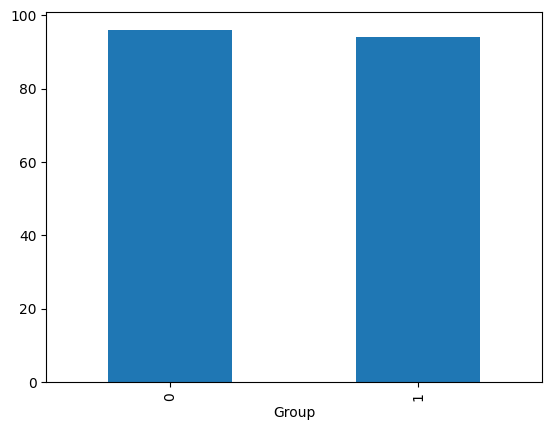

In [ ]:
df_cleaned.groupby(['Group']).size().plot(kind = "bar")

<Axes: xlabel='Race'>

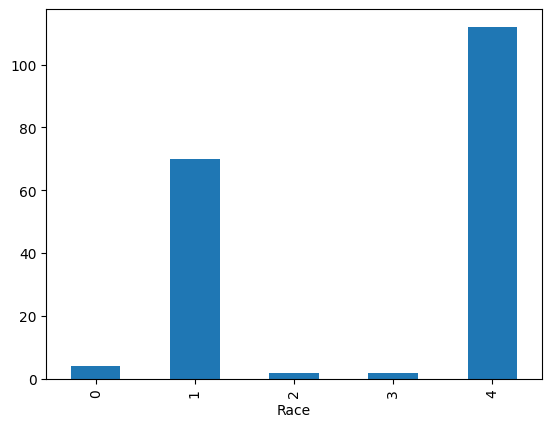

In [ ]:
df_cleaned.groupby(['Race']).size().plot(kind = "bar")

<Axes: xlabel='Ethnicity'>

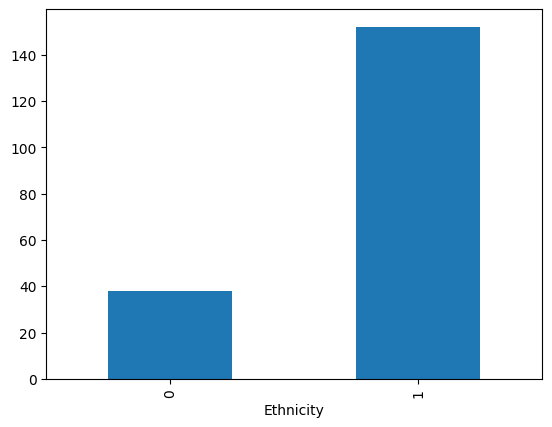

In [ ]:
df_cleaned.groupby(['Ethnicity']).size().plot(kind = "bar")

<Axes: xlabel='Sex'>

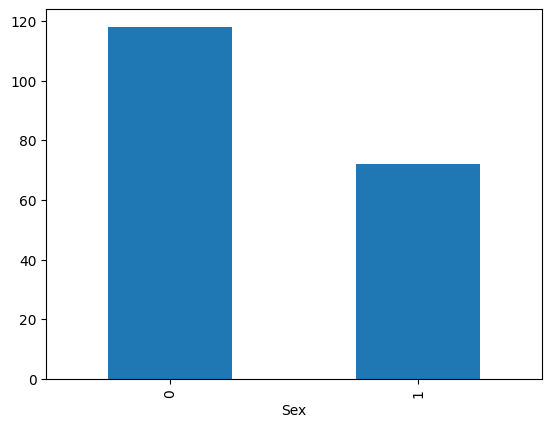

In [ ]:
df_cleaned.groupby(['Sex']).size().plot(kind = "bar")

<Axes: xlabel='Age'>

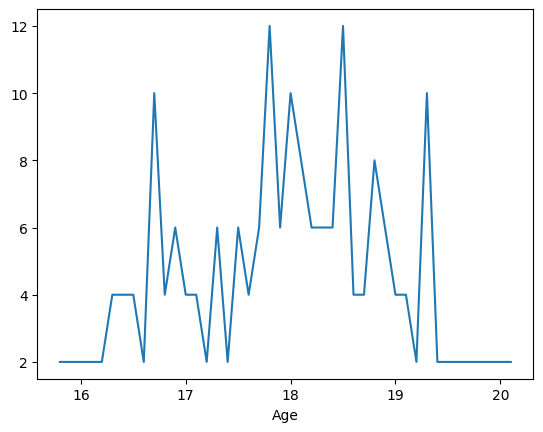

In [ ]:
df_cleaned.groupby(['Age']).size().plot(kind = "line")

##Corealtion

<Axes: >

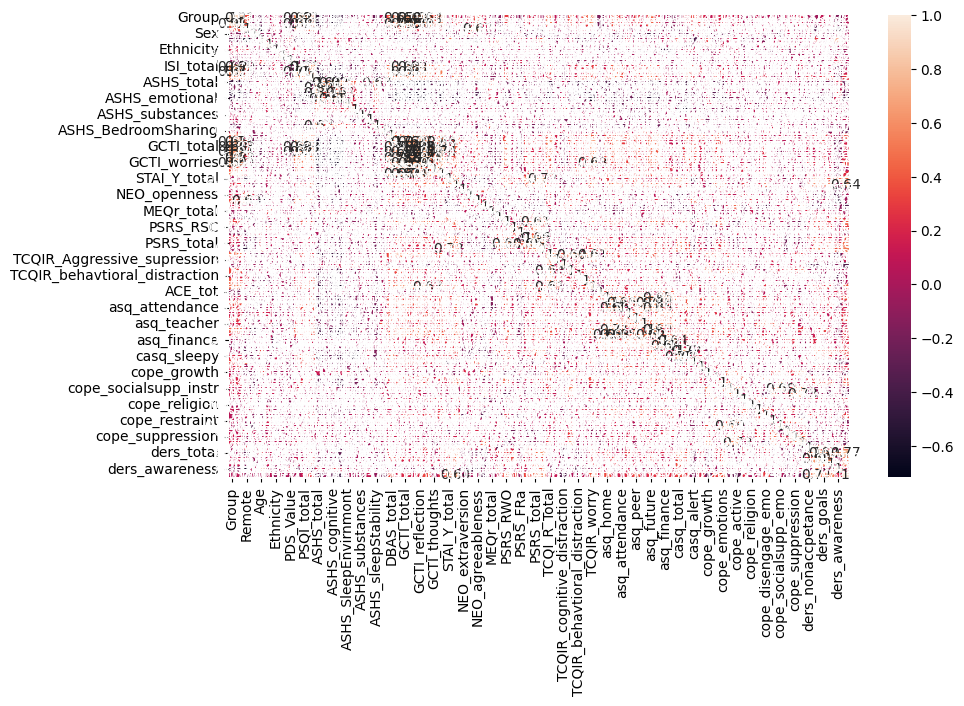

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
cor = df_cleaned.corr()
sns.heatmap(cor, ax=ax, annot=True)

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Group"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features


Group              1.000000
SubGroup           0.911815
ISI_total          0.615157
PSQI_total         0.613877
FIRST_total        0.646547
GCTI_total         0.676012
GCTI_anxiety       0.630465
GCTI_reflection    0.599352
GCTI_worries       0.636937
Name: Group, dtype: float64

In [ ]:
X_cor=df_cleaned[['ISI_total','PSQI_total','FIRST_total','GCTI_total','GCTI_anxiety','GCTI_reflection','GCTI_worries']]
Y_cor=df_cleaned['Group']
X_cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ISI_total        190 non-null    int64
 1   PSQI_total       190 non-null    int64
 2   FIRST_total      190 non-null    int64
 3   GCTI_total       190 non-null    int64
 4   GCTI_anxiety     190 non-null    int64
 5   GCTI_reflection  190 non-null    int64
 6   GCTI_worries     190 non-null    int64
dtypes: int64(7)
memory usage: 10.5 KB


#Decision Tree_corelation


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
## Split dataset into training set and test set
X_train_cor, X_test_cor, y_train_cor, y_test_cor = train_test_split(X_cor, Y_cor, test_size=0.2, random_state=1) # 80% training and 20% test


Model accuracy score:  0.8947368421052632
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.90      0.90      0.90        21

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38



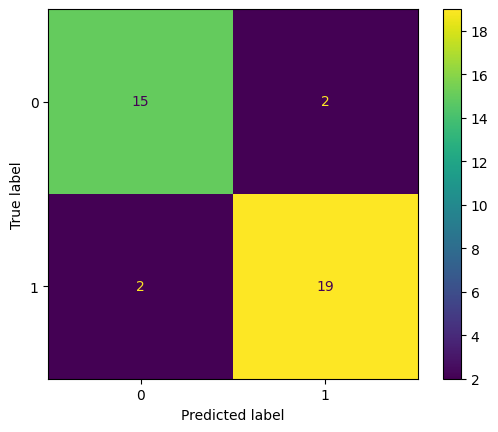

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=7)

# Train Decision Tree Classifer
clf = clf.fit(X_train_cor,y_train_cor)

#Predict the response for test dataset
y_pred_cor = clf.predict(X_test_cor)

# Model Accuracy, how often is the classifier correct?
DT_accuracy_cor=metrics.accuracy_score(y_test_cor, y_pred_cor)

print('Model accuracy score: ', DT_accuracy_cor)

metrics.confusion_matrix(y_test_cor,y_pred_cor)
pd.crosstab(y_test_cor, y_pred_cor, rownames = ['Actual'], colnames =['Predicted'], margins = True)
print(metrics.classification_report(y_test_cor, y_pred_cor))

ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_cor,y_pred_cor)).plot()


#kNearest Neighbors_Corelation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_cor, y_train_cor)

KNeighborsClassifier(n_neighbors=2)

Model accuracy score:  0.8421052631578947
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.89      0.81      0.85        21

    accuracy                           0.84        38
   macro avg       0.84      0.85      0.84        38
weighted avg       0.85      0.84      0.84        38



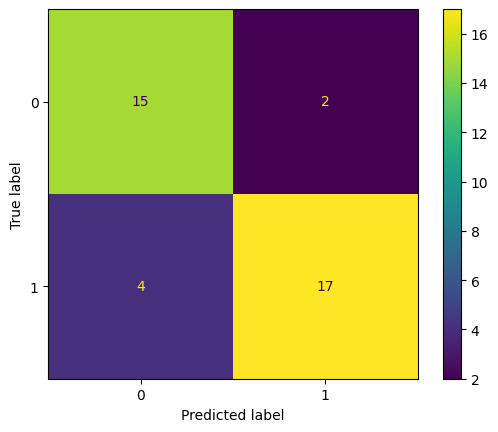

In [ ]:
#Predict the response for test dataset
y_pred_cor = knn_model.predict(X_test_cor)

# Model Accuracy, how often is the classifier correct?

knn_accuracy_cor=metrics.accuracy_score(y_test_cor, y_pred_cor)

print('Model accuracy score: ', knn_accuracy_cor)

metrics.confusion_matrix(y_test_cor,y_pred_cor)
pd.crosstab(y_test_cor, y_pred_cor, rownames = ['Actual'], colnames =['Predicted'], margins = True)
print(metrics.classification_report(y_test_cor, y_pred_cor))

ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_cor,y_pred_cor)).plot()

#SVC_Corelation

Model accuracy score:  0.8421052631578947
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.89      0.81      0.85        21

    accuracy                           0.84        38
   macro avg       0.84      0.85      0.84        38
weighted avg       0.85      0.84      0.84        38



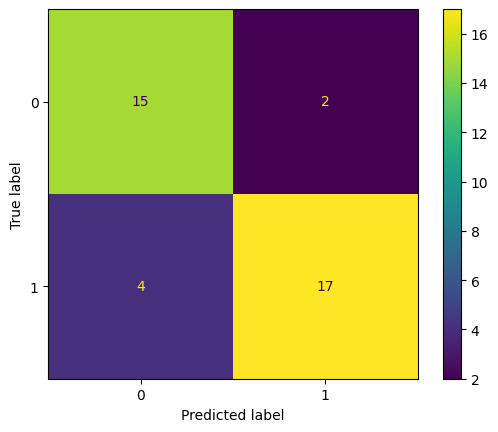

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()

# fit classifier to training set
svc.fit(X_train_cor,y_train_cor)


# make predictions on test set
y_pred=svc.predict(X_test_cor)


# compute and print accuracy score
SVC_accuracy_cor=metrics.accuracy_score(y_test_cor, y_pred_cor)

print('Model accuracy score: ', SVC_accuracy_cor)

metrics.confusion_matrix(y_test_cor,y_pred_cor)
pd.crosstab(y_test_cor, y_pred_cor, rownames = ['Actual'], colnames =['Predicted'], margins = True)
print(metrics.classification_report(y_test_cor, y_pred_cor))

ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_cor,y_pred_cor)).plot()

Model accuracy score with rbf kernel and C=100.0 : 0.8158
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.85      0.81      0.83        21

    accuracy                           0.82        38
   macro avg       0.81      0.82      0.81        38
weighted avg       0.82      0.82      0.82        38



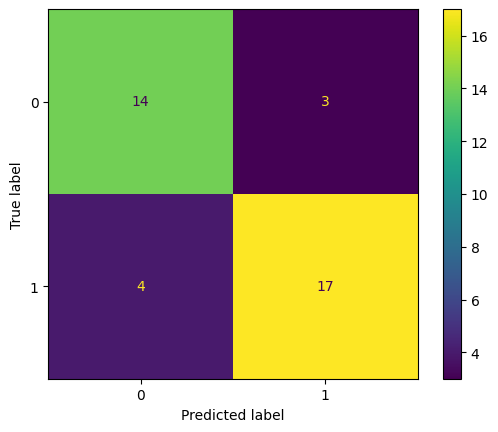

In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=10.0)


# fit classifier to training set
svc.fit(X_train_cor,y_train_cor)


# make predictions on test set
y_pred_cor=svc.predict(X_test_cor)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test_cor, y_pred_cor)))

metrics.confusion_matrix(y_test_cor,y_pred_cor)
pd.crosstab(y_test_cor, y_pred_cor, rownames = ['Actual'], colnames =['Predicted'], margins = True)
print(metrics.classification_report(y_test_cor, y_pred_cor))

ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_cor,y_pred_cor)).plot()

#Naive Baye_Corelation

Model accuracy score:  0.7894736842105263
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.84      0.76      0.80        21

    accuracy                           0.79        38
   macro avg       0.79      0.79      0.79        38
weighted avg       0.80      0.79      0.79        38



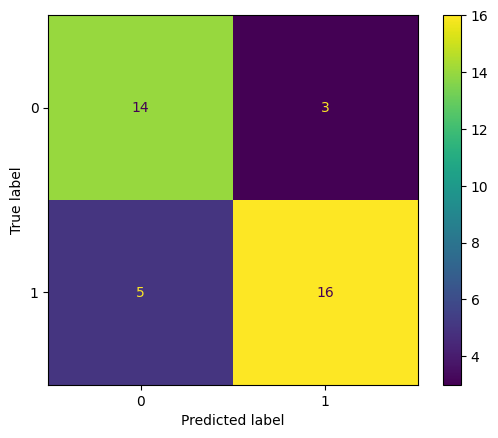

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_cor, y_train_cor)

y_pred_cor = gnb.predict(X_test_cor)

NB_accuracy_cor=metrics.accuracy_score(y_test_cor, y_pred_cor)

print('Model accuracy score: ', NB_accuracy_cor)

metrics.confusion_matrix(y_test_cor,y_pred_cor)
pd.crosstab(y_test_cor, y_pred_cor, rownames = ['Actual'], colnames =['Predicted'], margins = True)
print(metrics.classification_report(y_test_cor, y_pred_cor))

ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_cor,y_pred_cor)).plot()

#Caculating p Value

In [ ]:
import statsmodels.api as sm
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant
target=df_cleaned['Group']
features=df_cleaned.drop('Group', axis=1)
X_train,X_test, Y_train, Y_test = train_test_split(features, target, test_size = .3, random_state = 10)
x_incl_cons = sm.add_constant(X_train)
model = sm.OLS(Y_train, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results
# results.params
# results.pvalues
pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})

,coef,pvalue
const,-0.010458,0.001
SubGroup,0.453001,0.000
Remote,0.514876,0.000
Sex,0.156222,0.001
Age,0.010322,0.553
...,...,...
ders_total,0.044064,0.000
ders_goals,-0.072919,0.000
ders_impulse,0.000564,0.958
ders_awareness,-0.029623,0.000


In [ ]:
X_P=df_cleaned.drop(['Group','SubGroup','Age','Ethnicity','PDS','PDS_Value','PSQI_total','ASHS_SleepEnvirnmont','ASHS_DaytimeSleep','ASHS_substances','GCTI_worries','GCTI_thoughts','PSS_total','TCQIR_cognitive_distraction','asq_attendance','asq_leisure','asq_responsibility','cope_disengage_su','cope_socialsupp_instr','cope_socialsupp_emo','ders_impulse'],axis=1)
Y_P=df_cleaned['Group']
X_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Remote                         190 non-null    int64  
 1   Sex                            190 non-null    int64  
 2   Race                           190 non-null    int64  
 3   ISI_total                      190 non-null    int64  
 4   BDI_total                      190 non-null    int64  
 5   ASHS_total                     190 non-null    float64
 6   ASHS_physiological             190 non-null    int64  
 7   ASHS_cognitive                 190 non-null    float64
 8   ASHS_emotional                 190 non-null    float64
 9   ASHS_bedtimeRoutine            190 non-null    int64  
 10  ASHS_sleepStability            190 non-null    float64
 11  ASHS_BedroomSharing            190 non-null    float64
 12  DBAS_total                     190 non-null    int

In [ ]:
## Split dataset into training set and test set
X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(X_P, Y_P, test_size=0.2, random_state=1) # 80% training and 20% test

#Decision Tree_p

Accuracy: 0.8947368421052632
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.90      0.90      0.90        21

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38



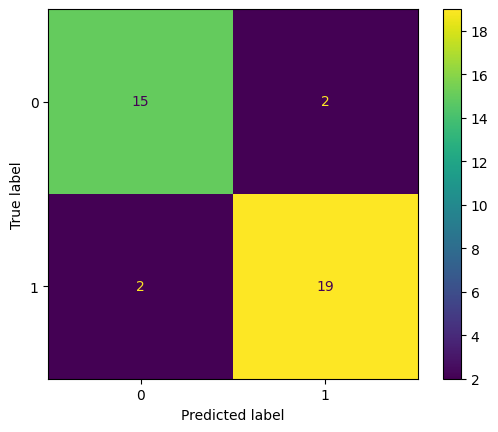

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train_P,y_train_P)

#Predict the response for test dataset
y_pred_P = clf.predict(X_test_P)

# Model Accuracy, how often is the classifier correct?
DT_accuracy_P=metrics.accuracy_score(y_test_P, y_pred_P)
print("Accuracy:",DT_accuracy_P)

metrics.confusion_matrix(y_test_P,y_pred_P)
pd.crosstab(y_test_P, y_pred_P, rownames = ['Actual'], colnames =['Predicted'], margins = True)
print(metrics.classification_report(y_test_P, y_pred_P))

ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_P,y_pred_P)).plot()

#kNearest Neighbors_P

Accuracy: 0.7368421052631579
              precision    recall  f1-score   support

           0       0.65      0.88      0.75        17
           1       0.87      0.62      0.72        21

    accuracy                           0.74        38
   macro avg       0.76      0.75      0.74        38
weighted avg       0.77      0.74      0.73        38



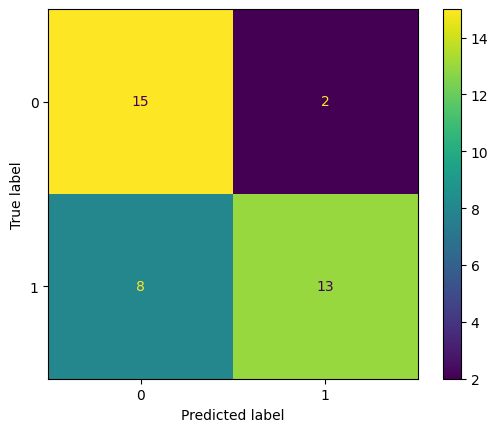

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_P, y_train_P)
#Predict the response for test dataset
y_pred_P = knn_model.predict(X_test_P)

# Model Accuracy, how often is the classifier correct?
knn_accuracy_P=metrics.accuracy_score(y_test_P, y_pred_P)
print("Accuracy:",knn_accuracy_P)

metrics.confusion_matrix(y_test_P,y_pred_P)
pd.crosstab(y_test_P, y_pred_P, rownames = ['Actual'], colnames =['Predicted'], margins = True)
print(metrics.classification_report(y_test_P, y_pred_P))

ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_P,y_pred_P)).plot()

#SVM_P

Accuracy: 0.7894736842105263
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.84      0.76      0.80        21

    accuracy                           0.79        38
   macro avg       0.79      0.79      0.79        38
weighted avg       0.80      0.79      0.79        38



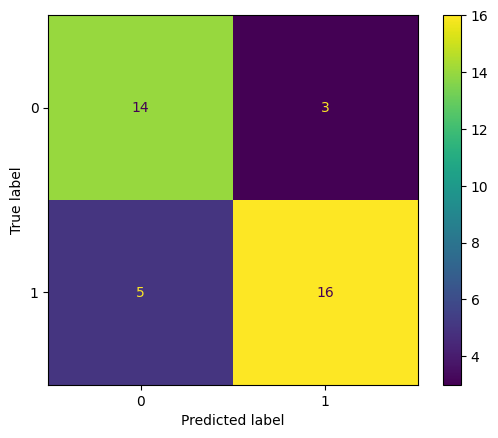

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()

# fit classifier to training set
svc.fit(X_train_P,y_train_P)


# make predictions on test set
y_pred_P=svc.predict(X_test_P)


# compute and print accuracy score
SVM_accuracy_P=accuracy_score(y_test_P, y_pred_P)
print("Accuracy:",SVM_accuracy_P)

metrics.confusion_matrix(y_test_P,y_pred_P)
pd.crosstab(y_test_P, y_pred_P, rownames = ['Actual'], colnames =['Predicted'], margins = True)
print(metrics.classification_report(y_test_P, y_pred_P))

ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_P,y_pred_P)).plot()

Model accuracy score with rbf kernel and C=100.0 : 0.868421052631579
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.90      0.86      0.88        21

    accuracy                           0.87        38
   macro avg       0.87      0.87      0.87        38
weighted avg       0.87      0.87      0.87        38



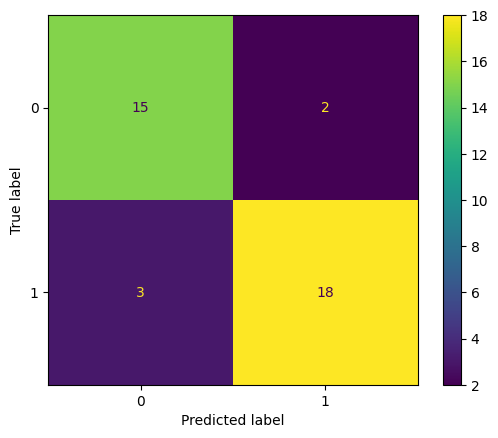

In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=10.0)


# fit classifier to training set
svc.fit(X_train_P,y_train_P)


# make predictions on test set
y_pred_P=svc.predict(X_test_P)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 :',metrics.accuracy_score(y_test_P, y_pred_P))

metrics.confusion_matrix(y_test_P,y_pred_P)
pd.crosstab(y_test_P, y_pred_P, rownames = ['Actual'], colnames =['Predicted'], margins = True)
print(metrics.classification_report(y_test_P, y_pred_P))

ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_P,y_pred_P)).plot()

#Naive Bayes_P

Accuracy: 0.7894736842105263
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.84      0.76      0.80        21

    accuracy                           0.79        38
   macro avg       0.79      0.79      0.79        38
weighted avg       0.80      0.79      0.79        38



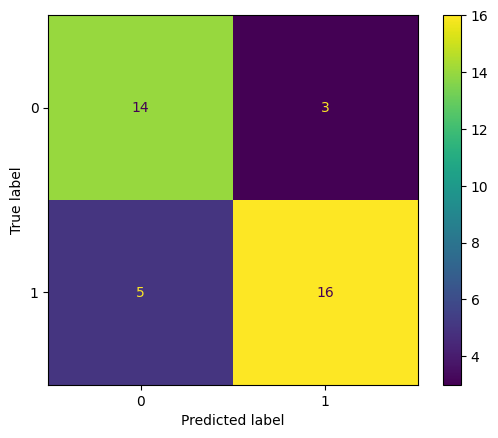

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_P, y_train_P)

y_pred_P = gnb.predict(X_test_P)

NB_accuracy_P=metrics.accuracy_score(y_test_P, y_pred_P)
print("Accuracy:",NB_accuracy_P)

metrics.confusion_matrix(y_test_P,y_pred_P)
pd.crosstab(y_test_P, y_pred_P, rownames = ['Actual'], colnames =['Predicted'], margins = True)
print(metrics.classification_report(y_test_P, y_pred_P))

ConfusionMatrixDisplay(metrics.confusion_matrix(y_test_P,y_pred_P)).plot()

In [ ]:
from tabulate import tabulate
print(tabulate({"Classifier" : ['Decision tree', 'KNN', 'SVM','NaiveBayes'], 'Corelation' : [DT_accuracy_cor, knn_accuracy_cor, SVC_accuracy_cor,NB_accuracy_cor],'P-Value':[DT_accuracy_P,knn_accuracy_P,SVM_accuracy_P,NB_accuracy_P]}, headers = 'keys'))

Classifier       Corelation    P-Value
-------------  ------------  ---------
Decision tree      0.894737   0.894737
KNN                0.842105   0.736842
SVM                0.842105   0.789474
NaiveBayes         0.789474   0.789474
